In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Readdata = pd.read_excel('Electrical Resistivity Data.xlsx',skiprows=2)

In [3]:
Temp = Readdata.iloc[:,1].values #oC
V = Readdata.iloc[:,2].values #mV

In [4]:
w = 0.5 #mm
x = 2 #mm
I = 5 #mA

In [5]:
def Resistivity(v,i):
    return (v/i)*(2*np.pi*x)* 10**(-3) #Ohm*m
    

In [6]:
rho = []

In [7]:
for v in V:
    
    rho.append(Resistivity(v,I))

In [8]:
rho

[1.0455220351146832,
 1.0379822127460676,
 0.9952565526572466,
 0.9424777960769379,
 0.8721061206365266,
 0.7967078969503715,
 0.7162831250184728,
 0.6358583530865742,
 0.562973403523291,
 0.4951150022057514,
 0.43228314913395555,
 0.37699111843077515,
 0.3292389100962103,
 0.28651325000738914,
 0.25132741228718347,
 0.22116812281272147,
 0.19352210746113127,
 0.17090264035528474,
 0.14828317324943827,
 0.1332035285122072,
 0.11812388377497622,
 0.10555751316061705,
 0.09299114254625789,
 0.08293804605477054]

In [9]:
lnrh =np.log10(rho)

In [10]:
print(lnrh)

[ 0.01933319  0.01618991 -0.00206495 -0.02572887 -0.05943067 -0.09870088
 -0.14491528 -0.19663962 -0.24951212 -0.30529391 -0.36423169 -0.42366888
 -0.48248884 -0.54285529 -0.59976014 -0.65527747 -0.71326942 -0.76725123
 -0.82890813 -0.87548427 -0.92766228 -0.97651085 -1.03155842 -1.0812462 ]


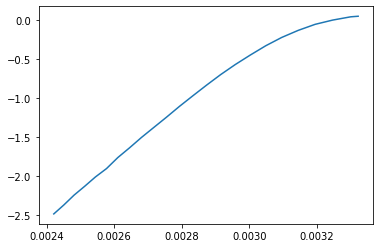

In [11]:
plt.plot(1/(Temp+273),np.log(rho))

In [12]:
wbyx = np.array([0.100,0.141,0.200,0.33,0.500,1.00,1.414,2.00,3.333,5.000,10.000])

In [13]:
wbyx

array([ 0.1  ,  0.141,  0.2  ,  0.33 ,  0.5  ,  1.   ,  1.414,  2.   ,
        3.333,  5.   , 10.   ])

In [14]:
f2 = [13.863,9.704,6.931,4.159,2.780,1.504,1.223,1.094,1.0228,1.0070,1.00045]

(1.0, 10.0)

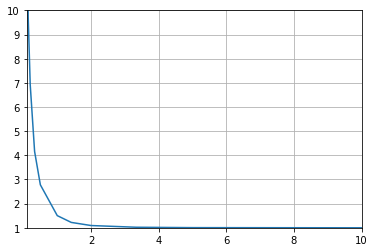

In [15]:
plt.plot(wbyx,f2)
plt.grid()
plt.xlim(0.1,10)
plt.ylim(1.0,10)

In [16]:
def func(x, a):
    return a/x

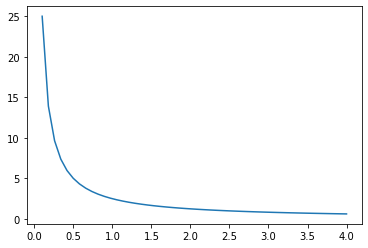

In [17]:
xdata = np.linspace(0.1, 4, 50)
y = func(xdata, 2.5)
plt.plot(xdata,y)

In [18]:
from scipy.optimize import curve_fit

In [19]:
popt, pcov = curve_fit(func, wbyx,f2)

In [20]:
popt[0]

1.3856801688475529

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


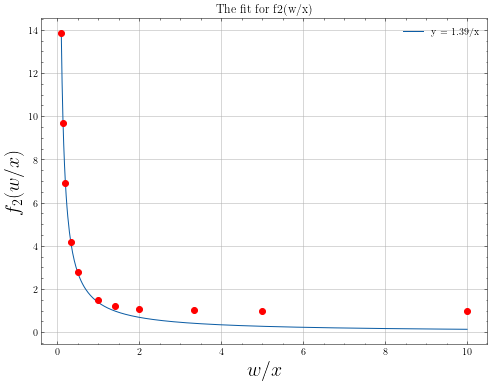

In [21]:
plt.figure(figsize=(8,6))
plt.style.use('science')
xdata = np.linspace(0.1,10, 500)
y = func(xdata, popt[0])
plt.plot(xdata,y,label="y = %.2f/x"%(popt[0]))
plt.plot(wbyx,f2,"ro")

plt.xlabel("$w/x$",fontsize=20)
plt.ylabel("$f_2 (w/x)$",fontsize=20)
plt.title("The fit for f2(w/x)")
plt.legend()
plt.grid()
plt.savefig("fitforf2.pdf")

In [22]:
f2corr = func(0.25,popt[0])

In [36]:
f2corr

5.542720675390211

In [23]:
T = Temp + 273.15
rhoc = rho/f2corr


Tinv = 1/T
lnrho = np.log(rhoc)

In [24]:
Tinv

array([0.0033206 , 0.0032987 , 0.00324517, 0.00319336, 0.00314317,
       0.00309454, 0.00304739, 0.00300165, 0.00295727, 0.00291418,
       0.00287233, 0.00283166, 0.00279213, 0.00275368, 0.00271628,
       0.00267989, 0.00264445, 0.00260994, 0.00257632, 0.00254356,
       0.00251162, 0.00248047, 0.00245008, 0.00242043])

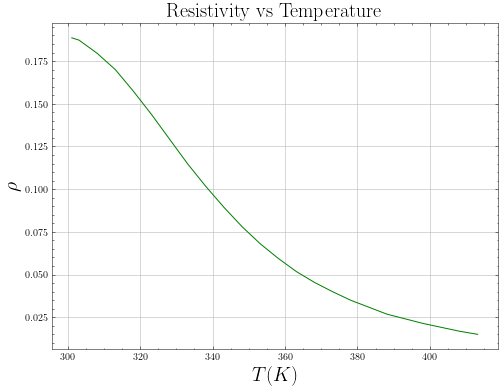

In [25]:
plt.figure(figsize=(8,6))
plt.plot(T,rhoc,c="g")
plt.grid()
plt.xlabel("$T (K)$",fontsize=20)
plt.ylabel("$\\rho$",fontsize=20)
plt.title("Resistivity vs Temperature",fontsize=20)
plt.savefig("resvst.pdf")

In [26]:
len(Tinv)

24

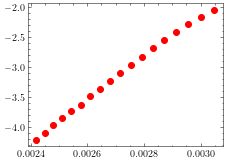

In [27]:
plt.plot(Tinv[6:24],lnrho[6:24],"ro")

In [28]:
def straight(x,m,c):
    return m*x+c

In [29]:
popt, pcov = curve_fit(straight,Tinv[6:24],lnrho[6:24])

In [30]:
popt

array([3495.77735333,  -12.61900898])

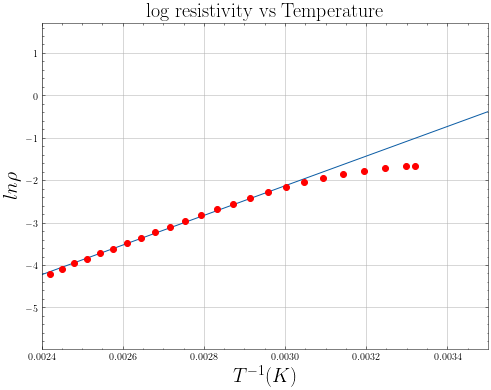

In [31]:
plt.figure(figsize=(8,6))
x = np.linspace(2.0,4,100)*10**(-3)

y = straight(x,popt[0],popt[1])

plt.plot(x,y)
plt.plot(Tinv,lnrho,"ro")
plt.grid()
plt.xlim(0.0024,0.0035)
plt.xlabel("$T^{-1} (K)$",fontsize=20)
plt.ylabel("$ln\\rho$",fontsize=20)
plt.title("log resistivity vs Temperature",fontsize=20)
plt.savefig("logresvst.pdf")

In [32]:
k = (8.617) * 10**(-5)

E =popt[0] * 2*k 

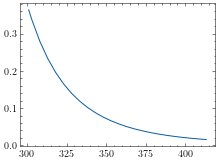

In [33]:
r= np.exp(popt[1]) * np.exp(popt[0]*Tinv)

plt.plot(T,r)

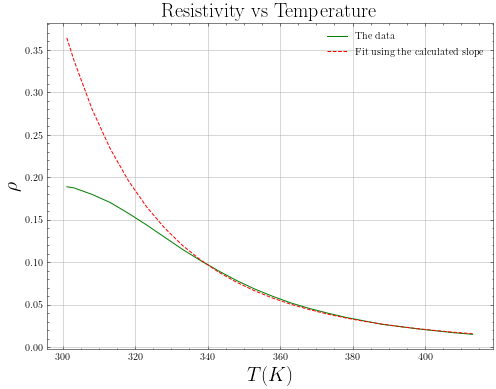

In [34]:
plt.figure(figsize=(8,6))
plt.plot(T,rhoc,"g-",label="The data")
plt.plot(T,r,"r--",label="Fit using the calculated slope")
plt.xlabel("$T (K)$",fontsize=20)
plt.ylabel("$\\rho$",fontsize=20)
plt.title("Resistivity vs Temperature",fontsize=20)

plt.legend()
plt.grid()
plt.savefig("resvstcomp.pdf")

In [37]:
DE = np.mean(T*2*k* 0.01)

In [38]:
E

0.6024622690731598

In [39]:
DE/E * 100

0.10177278586147331

In [40]:
DE

0.0006131426350000001

For a temperature range in the middle of Figure , the resistivity remained relatively constant while the material heats. This accounts for the additional charge carriers found in extrinsic semiconductors that have already decreased the resistivity of the semiconductor below the value for the intrinsic counterpart. During the region of temperatures when the resistivity is not changing, the number of electrons being thermally excited to the conduction band is not yet large enough to influence the resistivity as much as the extrinsic doping has. Eventually the number of excited electrons becomes great enough to resume the intrinsic temperature dependent trend.